# Exploratory data Analysis:
- **Database:** CheMBL Bioactivity Database
- **Protein:** MAP kinase ERK2 Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 4)


In [2]:
X = pd.read_csv("ERK2.csv", sep=";")

In [3]:
X.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL440356,NaN,0,243.06,0,1.09,2,O=C1CCNC(=O)c2[nH]c(Br)cc21,IC50,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1135814,1,Scientific Literature,J. Med. Chem.,2002.0,None,NaN
1,CHEMBL260417,NaN,0,373.21,0,3.44,SB-725317,O=C(Nc1n[nH]c2nc(-c3ccc(O)cc3)c(Br)cc12)C1CC1,Inhibition,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1961873,16,GSK Published Kinase Inhibitor Set,NaN,NaN,None,NaN
2,CHEMBL213451,NaN,0,323.33,0,3.62,43,CCNc1nnc2ccc(-c3ocnc3-c3ccc(F)cc3)cn12,IC50,'>',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1145312,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2006.0,None,NaN
3,CHEMBL176384,NaN,0,256.33,0,2.66,15,Cn1cnc2c(SCc3ccccc3)ncnc21,Inhibition,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1141882,1,Scientific Literature,J. Med. Chem.,2005.0,None,NaN
4,CHEMBL214198,NaN,0,339.35,0,4.19,79,CC(C)c1nnc2ccc(-c3c[nH]nc3-c3cc(F)ccc3F)cn12,IC50,'>',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1145312,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2006.0,None,NaN


In [4]:
X.tail()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
23301,CHEMBL4566600,PPTN-NC,0,489.54,1,7.67,EUB0000337,Cc1c(C(=O)O)cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3cc...,% Control,NaN,...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4507292,54,Donated Chemical Probes - SGC Frankfurt,NaN,2021.0,None,Compound concentration None 1000.0 nM
23302,CHEMBL3582478,MSD-CYP11B2,0,311.36,0,3.80,EUB0000313,CC(C)(O)c1cncc(-c2nc3ccc(F)cc3n2C2CC2)c1,% Control,NaN,...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4507294,54,Donated Chemical Probes - SGC Frankfurt,NaN,2021.0,None,Compound concentration None 1000.0 nM
23303,CHEMBL3337894,T-26c,0,479.51,0,3.34,EUB0000729,COc1cccc(CNC(=O)c2nc3scc(COCc4ccc(C(=O)O)cc4)c...,% Control,NaN,...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4507300,54,Donated Chemical Probes - SGC Frankfurt,NaN,2021.0,None,Compound concentration None 1000.0 nM
23304,CHEMBL4630642,BAY-974,0,422.49,0,4.42,EUB0000707,CC1=C(C#N)C(c2ccc3c(c2)c(NC(=O)c2ccccc2C)nn3C)...,% Control,NaN,...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4507319,54,Donated Chemical Probes - SGC Frankfurt,NaN,2021.0,None,Compound concentration None 1000.0 nM
23305,CHEMBL1939876,BI 4394,0,446.46,0,3.37,EUB0000730,CCOC(=O)c1cc2cc(-c3cc(C(=O)NCc4ccc(C(=O)O)cc4)...,% Ctrl,NaN,...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4507281,54,Donated Chemical Probes - SGC Frankfurt,NaN,2021.0,None,Compound concentration None 10.0 µM


In [5]:
X.shape

(23306, 45)

In [6]:
X.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [7]:
#length of columns
len(X.columns)

45

In [8]:
#save the columns names in csv
column_names=pd.DataFrame(X.columns, columns=["column_names"])

In [9]:
column_names

,column_names
0,Molecule ChEMBL ID
1,Molecule Name
2,Molecule Max Phase
3,Molecular Weight
4,#RO5 Violations
5,AlogP
6,Compound Key
7,Smiles
8,Standard Type
9,Standard Relation


In [10]:
column_names.to_csv("ERK2-chembl_columns.csv", index=None)

In [11]:
#datatypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23306 entries, 0 to 23305
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          23306 non-null  object 
 1   Molecule Name               3764 non-null   object 
 2   Molecule Max Phase          23306 non-null  int64  
 3   Molecular Weight            23306 non-null  object 
 4   #RO5 Violations             23306 non-null  object 
 5   AlogP                       23306 non-null  object 
 6   Compound Key                23306 non-null  object 
 7   Smiles                      23196 non-null  object 
 8   Standard Type               23306 non-null  object 
 9   Standard Relation           21290 non-null  object 
 10  Standard Value              21441 non-null  float64
 11  Standard Units              21496 non-null  object 
 12  pChEMBL Value               17655 non-null  float64
 13  Data Validity Comment       56 

In [12]:
X.describe()#only for numerical variables


,Molecule Max Phase,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Potential Duplicate,Assay Variant Accession,Assay Variant Mutation,Source ID,Document Year
count,23306.0000,2.1441e+04,17655.0000,3564.0000,23306.0000,0.0,0.0,23306.0000,6144.0000
mean,0.3252,1.6797e+04,5.5161,19.0007,0.0053,NaN,NaN,11.1996,2014.4644
std,1.0596,4.9745e+04,1.4932,3.8331,0.0727,NaN,NaN,11.3284,3.6030
min,0.0000,-2.9600e+04,2.3000,1.9000,0.0000,NaN,NaN,1.0000,1998.0000
25%,0.0000,1.0000e+02,4.5000,16.6275,0.0000,NaN,NaN,7.0000,2013.0000
50%,0.0000,1.1700e+04,4.8000,19.2700,0.0000,NaN,NaN,7.0000,2015.0000
75%,0.0000,2.8184e+04,5.9000,21.7000,0.0000,NaN,NaN,7.0000,2016.0000
max,4.0000,5.0119e+06,11.0000,43.7900,1.0000,NaN,NaN,54.0000,2021.0000


In [13]:
#for both numerical & categorical variables
X.describe(include=["object"])

,Molecule ChEMBL ID,Molecule Name,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Units,...,Assay Parameters,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source Description,Document Journal,Cell ChEMBL ID,Properties
count,23306,3764,23306,23306,23306,23306,23196,23306,21290,21496,...,361,23306,23306,23306,23306,23306,23306,3382,23306,237
unique,20124,1988,8191,6,902,19442,20058,23,6,12,...,8,1,1,1,1,589,8,21,18,37
top,CHEMBL3590107,STAUROSPORINE,None,0,None,1,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,Potency,'=',nM,...,Direct Binder: yes,CHEMBL4040,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,PubChem BioAssays,Bioorg. Med. Chem. Lett.,None,Compound concentration None 1000.0 nM
freq,18,18,44,19839,185,60,18,13926,19834,19062,...,243,23306,23306,23306,23306,14660,14660,728,23190,91


In [14]:
#for finding duplicate chembl ids
X["Molecule ChEMBL ID"].value_counts()

CHEMBL3590107    18
CHEMBL388978     18
CHEMBL3590106    17
CHEMBL3544964    15
CHEMBL4071576    14
                 ..
CHEMBL1308632     1
CHEMBL1484080     1
CHEMBL1496162     1
CHEMBL1365881     1
CHEMBL4630642     1
Name: Molecule ChEMBL ID, Length: 20124, dtype: int64

In [15]:
X["Molecule Name"].value_counts()


STAUROSPORINE               18
ULIXERTINIB                 17
RAVOXERTINIB                15
ERKi                        12
SB-203580                   12
                            ..
ELLAGIC ACID                 1
NAFADOTRIDE                  1
CALCITRIOL                   1
CETYLPYRIDINIUM CHLORIDE     1
BAY-974                      1
Name: Molecule Name, Length: 1988, dtype: int64

- here we see STAUROSPORINE is repeated 18 times & so on

In [16]:
counts= X["Molecule Name"].value_counts().reset_index()

In [17]:
counts.columns=["Molecule Name", "Counts"]

In [18]:
counts.head()

,Molecule Name,Counts
0,STAUROSPORINE,18
1,ULIXERTINIB,17
2,RAVOXERTINIB,15
3,ERKi,12
4,SB-203580,12


In [19]:
counts.to_csv("ERK2_duplicate_molecules_name.csv", index=None)

In [20]:
X.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [21]:
X.isnull().sum()

Molecule ChEMBL ID                0
Molecule Name                 19542
Molecule Max Phase                0
Molecular Weight                  0
#RO5 Violations                   0
AlogP                             0
Compound Key                      0
Smiles                          110
Standard Type                     0
Standard Relation              2016
Standard Value                 1865
Standard Units                 1810
pChEMBL Value                  5651
Data Validity Comment         23250
Comment                        3786
Uo Units                       1833
Ligand Efficiency BEI         19742
Ligand Efficiency LE          19742
Ligand Efficiency LLE         19742
Ligand Efficiency SEI         19742
Potential Duplicate               0
Assay ChEMBL ID                   0
Assay Description                 0
Assay Type                        0
BAO Format ID                     0
BAO Label                         0
Assay Organism                    0
Assay Tissue ChEMBL ID      

In [22]:
subdata=X[["Molecule ChEMBL ID", "Smiles", "Standard Type", "Standard Relation", "Standard Value",
       "Standard Units"]]

In [23]:
subdata.shape

(23306, 6)

In [24]:
subdata.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL440356,O=C1CCNC(=O)c2[nH]c(Br)cc21,IC50,'=',539.00,nM
1,CHEMBL260417,O=C(Nc1n[nH]c2nc(-c3ccc(O)cc3)c(Br)cc12)C1CC1,Inhibition,'=',5.75,%
2,CHEMBL213451,CCNc1nnc2ccc(-c3ocnc3-c3ccc(F)cc3)cn12,IC50,'>',10000.00,nM
3,CHEMBL176384,Cn1cnc2c(SCc3ccccc3)ncnc21,Inhibition,'=',0.00,%
4,CHEMBL214198,CC(C)c1nnc2ccc(-c3c[nH]nc3-c3cc(F)ccc3F)cn12,IC50,'>',10000.00,nM


In [25]:
subdata["Standard Type"].value_counts()

Potency                                 13926
IC50                                     4668
Ki                                       1767
Inhibition                               1588
Kd                                        449
Activity                                  417
Residual Activity                         316
% Control                                 108
Ka                                         10
T1/2                                       10
Kdiss                                      10
Residual activity                           9
% Ctrl                                      6
FC                                          4
% residual kinase activity                  4
Residual_activity                           3
NT                                          3
Control                                     2
EC50                                        2
Ratio IC50                                  1
Inihibition                                 1
INH                               

In [26]:
subdata["Standard Units"].value_counts()

nM           19062
%             2399
hr              10
10'-6/M/s        6
10'-5/M/s        4
10'-4/s          3
10'-3/s          3
10'-5/s          3
µM               3
ug.mL-1          1
pM               1
10'-2/s          1
Name: Standard Units, dtype: int64

In [27]:
subdata=subdata[subdata["Standard Units"].str.contains("nM", na=False)]

In [28]:
subdata.shape

(19062, 6)

In [29]:
subdata["Standard Value"].isnull().sum()

4

In [30]:
subdata.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL440356,O=C1CCNC(=O)c2[nH]c(Br)cc21,IC50,'=',539.0,nM
2,CHEMBL213451,CCNc1nnc2ccc(-c3ocnc3-c3ccc(F)cc3)cn12,IC50,'>',10000.0,nM
4,CHEMBL214198,CC(C)c1nnc2ccc(-c3c[nH]nc3-c3cc(F)ccc3F)cn12,IC50,'>',10000.0,nM
5,CHEMBL323336,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(Br)cc4)CC3)c2cc1OC,IC50,'>',30000.0,nM
7,CHEMBL524266,Nc1nccc(-c2cc3c([nH]2)[C@@H](CCF)CNC3=O)n1,IC50,'=',846.0,nM


In [31]:
subdata.tail()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
23291,CHEMBL3903396,COCC(C)Nc1ncc2ccc(C(=O)N[C@@H](c3ccc(OC)c(F)c3...,IC50,'=',15.0,nM
23292,CHEMBL3917843,COc1ccnc(C(NC(=O)c2cc(F)c3cnc(NC4CCOCC4)nc3c2)...,IC50,'=',61.0,nM
23293,CHEMBL3954924,Cn1cc([C@@H](NC(=O)c2ccc3cnc(NC4CCOCC4)nc3c2)c...,IC50,'=',5.2,nM
23294,CHEMBL3970902,Cn1cc([C@@H](NC(=O)c2cc(F)c3cnc(NC4CCOCC4)nc3c...,IC50,'=',1.3,nM
23295,CHEMBL3975792,COc1ccc([C@H](NC(=O)c2ccc3cnc(Nc4ccnc(C)c4)nc3...,IC50,'=',4.8,nM


In [32]:
subdata.sort_values("Standard Value", ascending=True).reset_index(drop=True)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL4868141,Nc1ncc(-c2ccc(NS(=O)(=O)C3CC3)cc2OC2CCCCC2)cc1...,IC50,'=',-2.9600e+04,nM
1,CHEMBL4115001,Nc1ncc([C@@H]2CC[C@@H](O)[C@H](O)C2)nc1-c1ccc(...,IC50,'=',4.3100e-03,nM
2,CHEMBL4111166,NC[C@@H](NC(=O)c1ccc(-c2nc([C@@H]3CC[C@@H](O)[...,IC50,'=',5.0000e-03,nM
3,CHEMBL3904235,Nc1ncc([C@H]2CC[C@H](O)[C@@H](O)C2)nc1-c1ccc(C...,IC50,'=',5.5000e-03,nM
4,CHEMBL3980387,NC[C@@H](NC(=O)c1ccc(-c2nc(C3CCOCC3)cnc2N)cc1F...,IC50,'=',6.1200e-03,nM
...,...,...,...,...,...,...
19057,CHEMBL1350100,CCC(=O)Nc1cc(C(=O)NCC2CCCN2CC)c(OC)cc1N(C)C,Potency,'=',5.0119e+06,nM
19058,CHEMBL115778,Nc1cc(OCCCc2ccccc2)c2c(-c3ccncc3)c(-c3ccc(F)cc...,IC50,NaN,NaN,nM
19059,CHEMBL113851,COc1cccc(COc2cc(N)[nH]c3nc(-c4ccc(F)cc4)c(-c4c...,IC50,NaN,NaN,nM
19060,CHEMBL263536,CCCCOc1cc(N)[nH]c2nc(-c3ccc(F)cc3)c(-c3ccncc3)...,IC50,NaN,NaN,nM


In [33]:
subdata.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL440356,O=C1CCNC(=O)c2[nH]c(Br)cc21,IC50,'=',539.0,nM
2,CHEMBL213451,CCNc1nnc2ccc(-c3ocnc3-c3ccc(F)cc3)cn12,IC50,'>',10000.0,nM
4,CHEMBL214198,CC(C)c1nnc2ccc(-c3c[nH]nc3-c3cc(F)ccc3F)cn12,IC50,'>',10000.0,nM
5,CHEMBL323336,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(Br)cc4)CC3)c2cc1OC,IC50,'>',30000.0,nM
7,CHEMBL524266,Nc1nccc(-c2cc3c([nH]2)[C@@H](CCF)CNC3=O)n1,IC50,'=',846.0,nM


In [34]:
subdata["Standard Type"].value_counts()

Potency    13926
IC50        3802
Ki           895
Kd           437
EC50           2
Name: Standard Type, dtype: int64

In [35]:
potency=subdata[subdata["Standard Type"].str.contains("Potency")]

In [36]:
IC50=subdata[subdata["Standard Type"].str.contains("IC50")]

In [37]:
new_data = subdata[["Molecule ChEMBL ID", "Standard Value" ]]

- lower the standard value, better is the molecules potential against target

In [38]:
new_data["Standard Value"].min()
#its quite unusual value

-29600.0

- as "Standard Value" = -29600 is quite impossible so we'll drop the row containing this molecules. 


In [39]:
new_data=new_data.drop(index=21396, axis=0)

In [40]:
new_data.head()

,Molecule ChEMBL ID,Standard Value
0,CHEMBL440356,539.0
2,CHEMBL213451,10000.0
4,CHEMBL214198,10000.0
5,CHEMBL323336,30000.0
7,CHEMBL524266,846.0


In [41]:
new_data["Standard Value"].min()
#its quite unusual value

0.00431

In [42]:
new_data["Standard Value"].max()

5011872.3

# Binary Classification:
 - active (1) molecules
 - inactive (0) molecules

Let's create ERK2 protein inhibitors binary classification dataset for ML models.
- we'll count value<= 10000nM as "Active" or "Positive (1) class
- and value>=20000nM as "Inactive" or "Negative(0)" class

In [43]:
new_data["Molecule ChEMBL ID"].value_counts()

CHEMBL388978     13
CHEMBL3590107    11
CHEMBL3590106    10
CHEMBL4538174    10
CHEMBL3544964     9
                 ..
CHEMBL1450426     1
CHEMBL1324794     1
CHEMBL1587516     1
CHEMBL1548931     1
CHEMBL3975792     1
Name: Molecule ChEMBL ID, Length: 17846, dtype: int64

In [44]:
new_data[new_data["Molecule ChEMBL ID"].str.contains("CHEMBL388978")]

,Molecule ChEMBL ID,Standard Value
354,CHEMBL388978,7300.0
1734,CHEMBL388978,370.0
2780,CHEMBL388978,4491.0
4683,CHEMBL388978,8451.0
6610,CHEMBL388978,2.5
11666,CHEMBL388978,7300.0
13363,CHEMBL388978,659.1
17208,CHEMBL388978,370.0
18975,CHEMBL388978,1.0
19558,CHEMBL388978,3948.0


#here we see some values are as low 1nM (very efficient against protein target) & some are as high as 34,000. so same molecule is showing both active as well inactive behaviour. this variation in values is because data is collected from different assays. 

In [45]:
#in such scenarios we can opt for mean of standard value 
new_data.columns

Index(['Molecule ChEMBL ID', 'Standard Value'], dtype='object')

In [46]:
new_data["new_value"]=new_data[['Molecule ChEMBL ID', 'Standard Value']].groupby(['Molecule ChEMBL ID'])['Standard Value'].transform("mean")

In [47]:
new_data.head()

,Molecule ChEMBL ID,Standard Value,new_value
0,CHEMBL440356,539.0,539.0
2,CHEMBL213451,10000.0,10000.0
4,CHEMBL214198,10000.0,10000.0
5,CHEMBL323336,30000.0,30000.0
7,CHEMBL524266,846.0,846.0


- first we'll molecules on the basis of standard values & then drop duplicates keeping first molecule(having lowest std value means having high potency against proetin target)

In [48]:
new_data=new_data.sort_values("new_value", ascending=True)

In [49]:
new_data

,Molecule ChEMBL ID,Standard Value,new_value
15986,CHEMBL4115001,4.3100e-03,4.3100e-03
14703,CHEMBL4111166,5.0000e-03,5.0000e-03
22973,CHEMBL3904235,5.5000e-03,5.5000e-03
13280,CHEMBL3980387,6.1200e-03,6.1200e-03
22769,CHEMBL4107592,6.6500e-03,6.6500e-03
...,...,...,...
9686,CHEMBL1350100,5.0119e+06,5.0119e+06
3151,CHEMBL115778,NaN,NaN
3275,CHEMBL113851,NaN,NaN
11193,CHEMBL263536,NaN,NaN


In [50]:
new_data=new_data.drop_duplicates("Molecule ChEMBL ID", keep="first")

In [51]:
new_data.shape

(17846, 3)

In [52]:
new_data.head()

,Molecule ChEMBL ID,Standard Value,new_value
15986,CHEMBL4115001,0.0043,0.0043
14703,CHEMBL4111166,0.0050,0.0050
22973,CHEMBL3904235,0.0055,0.0055
13280,CHEMBL3980387,0.0061,0.0061
22769,CHEMBL4107592,0.0066,0.0066


- CHEMBL4868141 molecule have standard value equals to -29600 which is quite impossible so we'll drop this molecule before proceeding further

In [53]:
new_data["Molecule ChEMBL ID"].value_counts()

CHEMBL4115001    1
CHEMBL1598344    1
CHEMBL1527794    1
CHEMBL1393919    1
CHEMBL1577814    1
                ..
CHEMBL1992634    1
CHEMBL1985074    1
CHEMBL1986530    1
CHEMBL1965351    1
CHEMBL325211     1
Name: Molecule ChEMBL ID, Length: 17846, dtype: int64

- now we don't have duplicate molecules so we have 17847 unique molecules (in terms of Chembl ids)

In [54]:
new_data.head()

,Molecule ChEMBL ID,Standard Value,new_value
15986,CHEMBL4115001,0.0043,0.0043
14703,CHEMBL4111166,0.0050,0.0050
22973,CHEMBL3904235,0.0055,0.0055
13280,CHEMBL3980387,0.0061,0.0061
22769,CHEMBL4107592,0.0066,0.0066


In [55]:
active=new_data.loc[new_data["new_value"]<=10000]

In [56]:
active

,Molecule ChEMBL ID,Standard Value,new_value
15986,CHEMBL4115001,0.0043,0.0043
14703,CHEMBL4111166,0.0050,0.0050
22973,CHEMBL3904235,0.0055,0.0055
13280,CHEMBL3980387,0.0061,0.0061
22769,CHEMBL4107592,0.0066,0.0066
...,...,...,...
2496,CHEMBL206783,10000.0000,10000.0000
9034,CHEMBL1308898,10000.0000,10000.0000
6394,CHEMBL1448672,10000.0000,10000.0000
14130,CHEMBL379905,10000.0000,10000.0000


In [57]:
inactive=new_data.loc[new_data["new_value"]>=20000]

In [58]:
inactive

,Molecule ChEMBL ID,Standard Value,new_value
6531,CHEMBL601719,10000.0,20000.0
20627,CHEMBL1173655,30000.0,20000.0
22668,CHEMBL1094408,30000.0,20000.0
6567,CHEMBL1908397,10000.0,20000.0
20438,CHEMBL180022,30000.0,20000.0
...,...,...,...
17441,CHEMBL4125742,1000000.0,1000000.0
4164,CHEMBL4125992,1000000.0,1000000.0
4166,CHEMBL4128535,1000000.0,1000000.0
5180,CHEMBL4127417,1000000.0,1000000.0


In [59]:
active["label"]=1

/Users/promilasharan/opt/anaconda3/envs/uresearcher/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
active.head()

,Molecule ChEMBL ID,Standard Value,new_value,label
15986,CHEMBL4115001,0.0043,0.0043,1
14703,CHEMBL4111166,0.0050,0.0050,1
22973,CHEMBL3904235,0.0055,0.0055,1
13280,CHEMBL3980387,0.0061,0.0061,1
22769,CHEMBL4107592,0.0066,0.0066,1


In [61]:
inactive["label"]=0

/Users/promilasharan/opt/anaconda3/envs/uresearcher/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
inactive.head()

,Molecule ChEMBL ID,Standard Value,new_value,label
6531,CHEMBL601719,10000.0,20000.0,0
20627,CHEMBL1173655,30000.0,20000.0,0
22668,CHEMBL1094408,30000.0,20000.0,0
6567,CHEMBL1908397,10000.0,20000.0,0
20438,CHEMBL180022,30000.0,20000.0,0


In [63]:
combined=pd.concat([active,inactive], axis=0)

In [64]:
combined.shape

(14478, 4)

In [65]:
combined.head(5)

,Molecule ChEMBL ID,Standard Value,new_value,label
15986,CHEMBL4115001,0.0043,0.0043,1
14703,CHEMBL4111166,0.0050,0.0050,1
22973,CHEMBL3904235,0.0055,0.0055,1
13280,CHEMBL3980387,0.0061,0.0061,1
22769,CHEMBL4107592,0.0066,0.0066,1


In [66]:
combined.tail(5)

,Molecule ChEMBL ID,Standard Value,new_value,label
17441,CHEMBL4125742,1000000.0,1000000.0,0
4164,CHEMBL4125992,1000000.0,1000000.0,0
4166,CHEMBL4128535,1000000.0,1000000.0,0
5180,CHEMBL4127417,1000000.0,1000000.0,0
9686,CHEMBL1350100,5011872.3,5011872.3,0


In [67]:
labelled=combined[["Molecule ChEMBL ID", "label"]]

In [68]:
subdata

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL440356,O=C1CCNC(=O)c2[nH]c(Br)cc21,IC50,'=',539.0,nM
2,CHEMBL213451,CCNc1nnc2ccc(-c3ocnc3-c3ccc(F)cc3)cn12,IC50,'>',10000.0,nM
4,CHEMBL214198,CC(C)c1nnc2ccc(-c3c[nH]nc3-c3cc(F)ccc3F)cn12,IC50,'>',10000.0,nM
5,CHEMBL323336,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(Br)cc4)CC3)c2cc1OC,IC50,'>',30000.0,nM
7,CHEMBL524266,Nc1nccc(-c2cc3c([nH]2)[C@@H](CCF)CNC3=O)n1,IC50,'=',846.0,nM
...,...,...,...,...,...,...
23291,CHEMBL3903396,COCC(C)Nc1ncc2ccc(C(=O)N[C@@H](c3ccc(OC)c(F)c3...,IC50,'=',15.0,nM
23292,CHEMBL3917843,COc1ccnc(C(NC(=O)c2cc(F)c3cnc(NC4CCOCC4)nc3c2)...,IC50,'=',61.0,nM
23293,CHEMBL3954924,Cn1cc([C@@H](NC(=O)c2ccc3cnc(NC4CCOCC4)nc3c2)c...,IC50,'=',5.2,nM
23294,CHEMBL3970902,Cn1cc([C@@H](NC(=O)c2cc(F)c3cnc(NC4CCOCC4)nc3c...,IC50,'=',1.3,nM


In [69]:
common=pd.merge(combined, subdata, on="Molecule ChEMBL ID")

In [70]:
common

,Molecule ChEMBL ID,Standard Value_x,new_value,label,Smiles,Standard Type,Standard Relation,Standard Value_y,Standard Units
0,CHEMBL4115001,4.3100e-03,4.3100e-03,1,Nc1ncc([C@@H]2CC[C@@H](O)[C@H](O)C2)nc1-c1ccc(...,IC50,'=',4.3100e-03,nM
1,CHEMBL4111166,5.0000e-03,5.0000e-03,1,NC[C@@H](NC(=O)c1ccc(-c2nc([C@@H]3CC[C@@H](O)[...,IC50,'=',5.0000e-03,nM
2,CHEMBL3904235,5.5000e-03,5.5000e-03,1,Nc1ncc([C@H]2CC[C@H](O)[C@@H](O)C2)nc1-c1ccc(C...,IC50,'=',5.5000e-03,nM
3,CHEMBL3980387,6.1200e-03,6.1200e-03,1,NC[C@@H](NC(=O)c1ccc(-c2nc(C3CCOCC3)cnc2N)cc1F...,IC50,'=',6.1200e-03,nM
4,CHEMBL4107592,6.6500e-03,6.6500e-03,1,CNC[C@@H](NC(=O)c1ccc(-c2nc([C@H]3CC[C@H](O)CC...,IC50,'=',6.6500e-03,nM
...,...,...,...,...,...,...,...,...,...
15439,CHEMBL4125742,1.0000e+06,1.0000e+06,0,Fc1ccc2[nH]cc(C3CCOCC3)c2c1,Kd,'>',1.0000e+06,nM
15440,CHEMBL4125992,1.0000e+06,1.0000e+06,0,NCc1cn(Cc2ccccc2C(F)(F)F)cn1,Kd,'>',1.0000e+06,nM
15441,CHEMBL4128535,1.0000e+06,1.0000e+06,0,CCOc1cc(N)cc(C(F)(F)F)c1,Kd,'>',1.0000e+06,nM
15442,CHEMBL4127417,1.0000e+06,1.0000e+06,0,Fc1ccc2[nH]cc(C3CCCNC3)c2c1,Kd,'>',1.0000e+06,nM


In [71]:
common["Molecule ChEMBL ID"].value_counts()

CHEMBL388978     13
CHEMBL3590107    11
CHEMBL3590106    10
CHEMBL4538174    10
CHEMBL3544964     9
                 ..
CHEMBL1344662     1
CHEMBL3198611     1
CHEMBL1574073     1
CHEMBL1390109     1
CHEMBL1350100     1
Name: Molecule ChEMBL ID, Length: 14478, dtype: int64

In [72]:
common=common[["Molecule ChEMBL ID", "Smiles", "label"]]

In [73]:
common=common.drop_duplicates("Molecule ChEMBL ID", keep="first")

In [74]:
common.shape

(14478, 3)

In [75]:
common1=pd.merge(combined, subdata, how="inner", on=["Molecule ChEMBL ID"],indicator=True)

In [76]:
common1

,Molecule ChEMBL ID,Standard Value_x,new_value,label,Smiles,Standard Type,Standard Relation,Standard Value_y,Standard Units,_merge
0,CHEMBL4115001,4.3100e-03,4.3100e-03,1,Nc1ncc([C@@H]2CC[C@@H](O)[C@H](O)C2)nc1-c1ccc(...,IC50,'=',4.3100e-03,nM,both
1,CHEMBL4111166,5.0000e-03,5.0000e-03,1,NC[C@@H](NC(=O)c1ccc(-c2nc([C@@H]3CC[C@@H](O)[...,IC50,'=',5.0000e-03,nM,both
2,CHEMBL3904235,5.5000e-03,5.5000e-03,1,Nc1ncc([C@H]2CC[C@H](O)[C@@H](O)C2)nc1-c1ccc(C...,IC50,'=',5.5000e-03,nM,both
3,CHEMBL3980387,6.1200e-03,6.1200e-03,1,NC[C@@H](NC(=O)c1ccc(-c2nc(C3CCOCC3)cnc2N)cc1F...,IC50,'=',6.1200e-03,nM,both
4,CHEMBL4107592,6.6500e-03,6.6500e-03,1,CNC[C@@H](NC(=O)c1ccc(-c2nc([C@H]3CC[C@H](O)CC...,IC50,'=',6.6500e-03,nM,both
...,...,...,...,...,...,...,...,...,...,...
15439,CHEMBL4125742,1.0000e+06,1.0000e+06,0,Fc1ccc2[nH]cc(C3CCOCC3)c2c1,Kd,'>',1.0000e+06,nM,both
15440,CHEMBL4125992,1.0000e+06,1.0000e+06,0,NCc1cn(Cc2ccccc2C(F)(F)F)cn1,Kd,'>',1.0000e+06,nM,both
15441,CHEMBL4128535,1.0000e+06,1.0000e+06,0,CCOc1cc(N)cc(C(F)(F)F)c1,Kd,'>',1.0000e+06,nM,both
15442,CHEMBL4127417,1.0000e+06,1.0000e+06,0,Fc1ccc2[nH]cc(C3CCCNC3)c2c1,Kd,'>',1.0000e+06,nM,both


In [77]:
common1["_merge"].value_counts()

both          15444
left_only         0
right_only        0
Name: _merge, dtype: int64

In [78]:
common2=pd.merge(combined, X, on="Molecule ChEMBL ID", how="outer",indicator=True)

In [79]:
common2["_merge"].value_counts()

both          15901
right_only     7405
left_only         0
Name: _merge, dtype: int64

In [80]:
common

,Molecule ChEMBL ID,Smiles,label
0,CHEMBL4115001,Nc1ncc([C@@H]2CC[C@@H](O)[C@H](O)C2)nc1-c1ccc(...,1
1,CHEMBL4111166,NC[C@@H](NC(=O)c1ccc(-c2nc([C@@H]3CC[C@@H](O)[...,1
2,CHEMBL3904235,Nc1ncc([C@H]2CC[C@H](O)[C@@H](O)C2)nc1-c1ccc(C...,1
3,CHEMBL3980387,NC[C@@H](NC(=O)c1ccc(-c2nc(C3CCOCC3)cnc2N)cc1F...,1
4,CHEMBL4107592,CNC[C@@H](NC(=O)c1ccc(-c2nc([C@H]3CC[C@H](O)CC...,1
...,...,...,...
15439,CHEMBL4125742,Fc1ccc2[nH]cc(C3CCOCC3)c2c1,0
15440,CHEMBL4125992,NCc1cn(Cc2ccccc2C(F)(F)F)cn1,0
15441,CHEMBL4128535,CCOc1cc(N)cc(C(F)(F)F)c1,0
15442,CHEMBL4127417,Fc1ccc2[nH]cc(C3CCCNC3)c2c1,0


- we can finally use this dataset for model building & other purposes

- we can again reconfirm that al molecules in common df are unique 

In [81]:
common["Smiles"].value_counts()

Nc1ncc([C@@H]2CC[C@@H](O)[C@H](O)C2)nc1-c1ccc(C(=O)N[C@H](CO)c2cc(F)cc(I)c2)c(F)c1    1
Cc1nn(-c2ccccc2)c(/N=C/c2ccc(O)cc2)c1-c1ccccc1                                        1
CCOC(=O)CCCNC(=O)CSc1nc2cc(OCC)ccc2[nH]1                                              1
CCc1cc(C(=O)Nc2ccc(C)cc2Br)cs1                                                        1
Cc1ccccc1CN1CCc2c(OCC(=O)N3CCCc4ccccc43)cccc2C1=O                                     1
                                                                                     ..
O=C(Cn1cnc2c(nnn2Cc2ccc(F)cc2)c1=O)N1CCCc2ccccc21                                     1
COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1                                                       1
COc1cccc(-c2ccc3ncnc(N(C)C)c3c2)c1                                                    1
c1ccc(-c2noc(C3CCCCC3)n2)nc1                                                          1
CCC(=O)Nc1cc(C(=O)NCC2CCCN2CC)c(OC)cc1N(C)C                                           1
Name: Smiles, Length: 14451, dty

- Though all chembl ids & smiles seems unique but before proceeding further, we should do bit more EDA from chemistry point of view, because same molecule can be represented by different Smiles so might be duplicated in disguise form

- we can generate a new column "new_id' containing the Chembl Id of molecules & their labels so that we can reuse it at different stages

In [82]:
common["new_id"]=common["Molecule ChEMBL ID"].astype(str)+"_"+common["label"].astype(str)

In [83]:
common

,Molecule ChEMBL ID,Smiles,label,new_id
0,CHEMBL4115001,Nc1ncc([C@@H]2CC[C@@H](O)[C@H](O)C2)nc1-c1ccc(...,1,CHEMBL4115001_1
1,CHEMBL4111166,NC[C@@H](NC(=O)c1ccc(-c2nc([C@@H]3CC[C@@H](O)[...,1,CHEMBL4111166_1
2,CHEMBL3904235,Nc1ncc([C@H]2CC[C@H](O)[C@@H](O)C2)nc1-c1ccc(C...,1,CHEMBL3904235_1
3,CHEMBL3980387,NC[C@@H](NC(=O)c1ccc(-c2nc(C3CCOCC3)cnc2N)cc1F...,1,CHEMBL3980387_1
4,CHEMBL4107592,CNC[C@@H](NC(=O)c1ccc(-c2nc([C@H]3CC[C@H](O)CC...,1,CHEMBL4107592_1
...,...,...,...,...
15439,CHEMBL4125742,Fc1ccc2[nH]cc(C3CCOCC3)c2c1,0,CHEMBL4125742_0
15440,CHEMBL4125992,NCc1cn(Cc2ccccc2C(F)(F)F)cn1,0,CHEMBL4125992_0
15441,CHEMBL4128535,CCOc1cc(N)cc(C(F)(F)F)c1,0,CHEMBL4128535_0
15442,CHEMBL4127417,Fc1ccc2[nH]cc(C3CCCNC3)c2c1,0,CHEMBL4127417_0


In [84]:
common.to_csv("ERK2_labelled_data.csv", index=None)

In [85]:
common[["Smiles", "new_id"]].to_csv("ERK2_labelled.smi", index=None, header=False, sep="\t")

In [86]:
X.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL440356,NaN,0,243.06,0,1.09,2,O=C1CCNC(=O)c2[nH]c(Br)cc21,IC50,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1135814,1,Scientific Literature,J. Med. Chem.,2002.0,None,NaN
1,CHEMBL260417,NaN,0,373.21,0,3.44,SB-725317,O=C(Nc1n[nH]c2nc(-c3ccc(O)cc3)c(Br)cc12)C1CC1,Inhibition,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1961873,16,GSK Published Kinase Inhibitor Set,NaN,NaN,None,NaN
2,CHEMBL213451,NaN,0,323.33,0,3.62,43,CCNc1nnc2ccc(-c3ocnc3-c3ccc(F)cc3)cn12,IC50,'>',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1145312,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2006.0,None,NaN
3,CHEMBL176384,NaN,0,256.33,0,2.66,15,Cn1cnc2c(SCc3ccccc3)ncnc21,Inhibition,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1141882,1,Scientific Literature,J. Med. Chem.,2005.0,None,NaN
4,CHEMBL214198,NaN,0,339.35,0,4.19,79,CC(C)c1nnc2ccc(-c3c[nH]nc3-c3cc(F)ccc3F)cn12,IC50,'>',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1145312,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2006.0,None,NaN


In [87]:
combined

,Molecule ChEMBL ID,Standard Value,new_value,label
15986,CHEMBL4115001,4.3100e-03,4.3100e-03,1
14703,CHEMBL4111166,5.0000e-03,5.0000e-03,1
22973,CHEMBL3904235,5.5000e-03,5.5000e-03,1
13280,CHEMBL3980387,6.1200e-03,6.1200e-03,1
22769,CHEMBL4107592,6.6500e-03,6.6500e-03,1
...,...,...,...,...
17441,CHEMBL4125742,1.0000e+06,1.0000e+06,0
4164,CHEMBL4125992,1.0000e+06,1.0000e+06,0
4166,CHEMBL4128535,1.0000e+06,1.0000e+06,0
5180,CHEMBL4127417,1.0000e+06,1.0000e+06,0


In [88]:
combined

,Molecule ChEMBL ID,Standard Value,new_value,label
15986,CHEMBL4115001,4.3100e-03,4.3100e-03,1
14703,CHEMBL4111166,5.0000e-03,5.0000e-03,1
22973,CHEMBL3904235,5.5000e-03,5.5000e-03,1
13280,CHEMBL3980387,6.1200e-03,6.1200e-03,1
22769,CHEMBL4107592,6.6500e-03,6.6500e-03,1
...,...,...,...,...
17441,CHEMBL4125742,1.0000e+06,1.0000e+06,0
4164,CHEMBL4125992,1.0000e+06,1.0000e+06,0
4166,CHEMBL4128535,1.0000e+06,1.0000e+06,0
5180,CHEMBL4127417,1.0000e+06,1.0000e+06,0


- for regression purposes, we can take "Molecule ChEMBL ID", & "new_value" 

In [89]:
labels=common["label"].value_counts().reset_index()
labels

,index,label
0,1,7242
1,0,7236


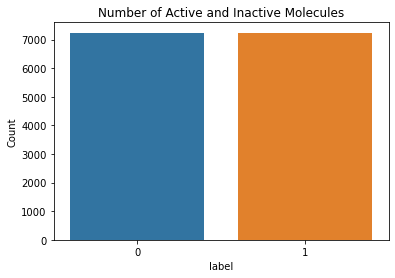

In [90]:
# Create a countplot using seaborn
sns.countplot(x='label', data=common)

# Add a title and labels to the plot
plt.title("Number of Active and Inactive Molecules")
plt.xlabel("label")
plt.ylabel("Count")

# Show the plot
plt.show()


- we see that we have almost equal distribution of molecules as active & inactive against target proetein

## distribution of active molecules

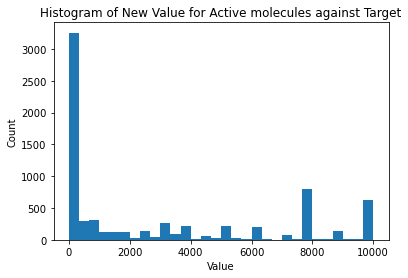

In [94]:
active["new_value"].hist(bins=30, grid=False)
plt.title("Histogram of New Value for Active molecules against Target")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

 - we see that most of the active molecules (approx. 3500 molecules) have "new_value" lies close to 0-200 nM

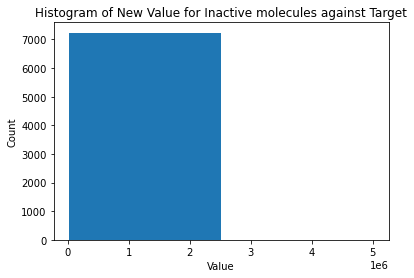

In [99]:
inactive["new_value"].hist(bins=2, grid=False)
plt.title("Histogram of New Value for Inactive molecules against Target")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

- we see that most of the inactive molecules (almost all molecules) have "new_value" lies close to 1 to 2.5x1e6 nM

- If a molecule is repeated in the dataset, it means that molecule is very well studied against the target, so we'll explore more about such molecules

In [100]:
frequent_binders=X.groupby("Molecule ChEMBL ID").filter(lambda x: len(x)>10)

In [101]:
frequent_binders

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
354,CHEMBL388978,STAUROSPORINE,0,466.54,0,4.35,Staurosporine,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,Kd,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1150977,1,Scientific Literature,Nat. Biotechnol.,2008.0,None,NaN
369,CHEMBL10,SB-203580,0,377.44,0,4.68,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,Inhibition,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1131612,1,Scientific Literature,J. Med. Chem.,1998.0,None,NaN
1683,CHEMBL10,SB-203580,0,377.44,0,4.68,SB-203580,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,Residual Activity,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL2218924,1,Scientific Literature,Biochem. J.,2013.0,None,NaN
1686,CHEMBL388978,STAUROSPORINE,0,466.54,0,4.35,Staurosporine,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,Residual Activity,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL2218924,1,Scientific Literature,Biochem. J.,2013.0,None,NaN
1734,CHEMBL388978,STAUROSPORINE,0,466.54,0,4.35,Staurosporine,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,IC50,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL1146058,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2006.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23242,CHEMBL3590106,ULIXERTINIB,2,433.34,0,4.67,ULIXERTINIB,CC(C)Nc1cc(-c2c[nH]c(C(=O)N[C@H](CO)c3cccc(Cl)...,Kd,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4321846,1,Scientific Literature,J Med Chem,2019.0,None,NaN
23243,CHEMBL3590106,ULIXERTINIB,2,433.34,0,4.67,ULIXERTINIB,CC(C)Nc1cc(-c2c[nH]c(C(=O)N[C@H](CO)c3cccc(Cl)...,Kdiss,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4321846,1,Scientific Literature,J Med Chem,2019.0,None,NaN
23244,CHEMBL3544964,RAVOXERTINIB,1,440.87,0,3.16,RAVOXERTINIB,Cn1nccc1Nc1nccc(-c2ccn([C@H](CO)c3ccc(Cl)c(F)c...,Ka,'=',...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4321846,1,Scientific Literature,J Med Chem,2019.0,None,NaN
23248,CHEMBL4538174,ERKi,0,311.35,0,2.33,EUB0000298,C[C@@H](NC(=O)Nc1cc2[nH]ncc2c(CO)n1)c1ccccc1,IC50,NaN,...,MAP kinase ERK2,Homo sapiens,SINGLE PROTEIN,CHEMBL4507286,54,Donated Chemical Probes - SGC Frankfurt,NaN,2021.0,None,NaN


In [102]:
frequent_binders["Molecule ChEMBL ID"].value_counts()

CHEMBL388978     18
CHEMBL3590107    18
CHEMBL3590106    17
CHEMBL3544964    15
CHEMBL4071576    14
CHEMBL10         12
CHEMBL4538174    12
CHEMBL4482864    11
Name: Molecule ChEMBL ID, dtype: int64

# correlation heatmap

<AxesSubplot:>

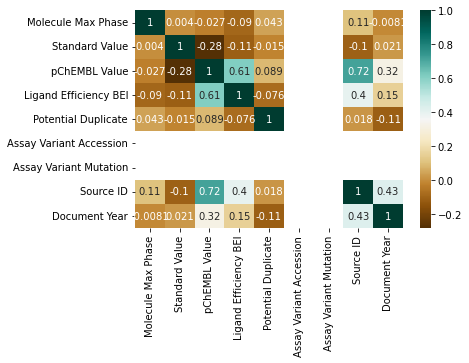

In [103]:
C = X.corr()
sns.heatmap(C, cmap="BrBG", annot=True)

 - Though this information is not much relevant here, but can use this correlation heatmap for finding correlation between molecule physicochemical properties & their effectiveness against the target protein

In [ ]:
1). Download the data for CDK2 protein (IC50, Ki, Kd), CHEMBL301
2). Open all the separated files with pandas
3). Concatenate all the three data files into one
 --> Total Molecules
 --> duplicated entries
--> Unique entries
--> create a mean column for standard value
--> create a binary classification and regression dataset

In [107]:
# if dataset is very large then we can use chunksize
chunk = 10**6
reader=pd.read_csv("ERK2.csv", sep=";", chunksize=chunk, low_memory=False)

In [108]:
reader

In [109]:
import modin.pandas as pd

ModuleNotFoundError: No module named 'modin'